In [43]:
import torch
import librosa

import numpy as np
import pandas as pd

from transformers import SpeechT5HifiGan

In [44]:
df = pd.read_csv('/l/users/speech_lab/_SpeechT5PretrainDataset/Finetune/TTS/hubert_labels/CLARTTS/valid.tsv', sep='\t', header=None, names=['audio_path', 'duration', 'speaker_embedding'], skiprows=1)
root = pd.read_csv('/l/users/speech_lab/_SpeechT5PretrainDataset/Finetune/TTS/hubert_labels/CLARTTS/valid.tsv', sep='\t').columns[0]
df

,audio_path,duration,speaker_embedding
0,test/ch_14_arabic_tts_dataset_330.wav,106370,speaker_embedding/CLARTTS_speaker_embedding.npy
1,test/ch_17_arabic_tts_dataset_484.wav,61665,speaker_embedding/CLARTTS_speaker_embedding.npy
2,test/ch_13_arabic_tts_dataset_96.wav,48300,speaker_embedding/CLARTTS_speaker_embedding.npy
3,test/ch_20_arabic_tts_dataset_388.wav,78313,speaker_embedding/CLARTTS_speaker_embedding.npy
4,test/ch_09_arabic_tts_dataset_121.wav,81688,speaker_embedding/CLARTTS_speaker_embedding.npy
5,test/ch_12_arabic_tts_dataset_326.wav,75126,speaker_embedding/CLARTTS_speaker_embedding.npy
6,test/ch_16_arabic_tts_dataset_456.wav,59425,speaker_embedding/CLARTTS_speaker_embedding.npy
7,test/ch_18_arabic_tts_dataset_237.wav,72994,speaker_embedding/CLARTTS_speaker_embedding.npy
8,test/ch_04_arabic_tts_dataset_43.wav,49474,speaker_embedding/CLARTTS_speaker_embedding.npy
9,test/ch_14_arabic_tts_dataset_51.wav,56386,speaker_embedding/CLARTTS_speaker_embedding.npy


In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan").to(device)

In [73]:
from IPython.display import Audio
import soundfile as sf
# original
audio, sr = sf.read(f'{root}/test/ch_12_arabic_tts_dataset_464.wav')
Audio(audio, rate=16000)

In [61]:
audio

array([ 3.05175781e-05, -1.52587891e-04, -3.66210938e-04, ...,
       -1.22070312e-04, -3.35693359e-04, -2.44140625e-04])

In [70]:
spectrogram = np.load('/l/users/speech_lab/_SpeechT5PretrainDataset/Finetune/TTS/results/CLARTTS/ch_12_arabic_tts_dataset_464-feats.npy')
with torch.no_grad():
    audio_generated = vocoder(torch.tensor(spectrogram)).squeeze().cpu().numpy()
Audio(audio_generated, rate=16000)

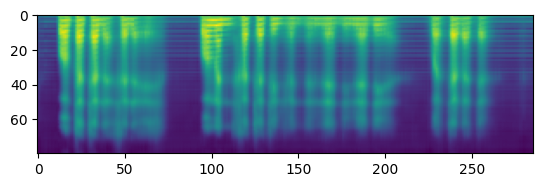

In [74]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

In [26]:
audio_generated

array([ 0.0079777 ,  0.00614595,  0.00350109, ..., -0.00115908,
       -0.00155239, -0.00151341], dtype=float32)